<a href="https://colab.research.google.com/github/ingcarlosleon/data-Mapainversiones/blob/main/scripts/infrastructure-gap-map/Infra_Gap_KMeans_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##**TechSprint para una mayor transparencia gubernamental**

📑**Planteamiento del problema 4:** ¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

📘 **Más sobre el problema:** https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

📚 **Equipo:** 2

🧑 **Integrantes:**
> Alice Raquel Rambo

> David Arnaldo	Durand Velasquez

> Doug McCalmont

> Milton Javier Mahecha Silva

> Carlos Julio León Caicedo

👩 **Mentores BID**:
> Carole Alazki (**Product Owner**)

> Anyela Milena (**Arquitecta de Datos**)

📅 Agosto de 2024
---

#**🚀 Avance 2. Ingeniería de Datos (Preparación de los Datos):**
El objetivo de este avance es enfocarnos en la limpieza, preprocesamiento y transformación de los datos. Se espera validar y definir las variables georreferenciadas, temporales y demás que se prioricen, preparen e integren de los tres conjuntos de datos analizados en el EDA, para luego usarlos en el modelado.

In [ ]:
!pip install pandas requests frictionless

**Obtener los Datos**: Cargamos los tres conjuntos de datos desde las fuentes CSV.

1.   **Dataset: Datos espaciales - Obras de la República Argentina (spatial-data-works)** Contiene la información espacial de las Obras de la República Argentina
2.   **Dataset: Proyectos de Inversión de la República Argentina (investment_projects)** Contiene información de los proyectos de obras de Inversión de La República Argentina
3.  **Obras de la República Argentina (datos_espaciales)** Contiene información de las Obras de la República Argentina

Fuente: https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg

In [36]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Nos Aseguramos que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

In [37]:
df_spatial_data_works.info()
df_investment_projects.info()
df_datos_espaciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

### Análisis de Nulos

Eliminamos las columnas organismo_financiador_2, organismo_financiador_prestamo y codigo_bahra por tener un gran porcentaje de datos faltantes de **df_spatial_data_works**.

In [38]:
df_spatial_data_works = df_spatial_data_works.drop(['organismo_financiador_2', 'organismo_financiador_prestamo', 'codigo_bahra'], axis=1)
df_spatial_data_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idproyecto                7317 non-null   int64  
 1   numeroobra                7317 non-null   object 
 2   codigobapin               7317 non-null   object 
 3   fechainicioanio           7317 non-null   int64  
 4   fechafinanio              7317 non-null   int64  
 5   nombreobra                7317 non-null   object 
 6   descripicionfisica        7317 non-null   object 
 7   montototal                7317 non-null   float64
 8   sectornombre              7317 non-null   object 
 9   avancefinanciero          7317 non-null   float64
 10  avancefisico              7317 non-null   float64
 11  entidadejecutoranombre    7317 non-null   object 
 12  duracionobrasdias         7317 non-null   int64  
 13  objetivogeneral           7317 non-null   object 
 14  tipoproy

Eliminamos la columna Objetivo la cual tiene el 78.9 % de datos faltantes en **df_investment_projects**

In [39]:
df_investment_projects = df_investment_projects.drop(['Objetivo'], axis=1)
df_investment_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IdProyecto          630 non-null    int64  
 1   CodigoBapin         630 non-null    int64  
 2   NombreProyecto      630 non-null    object 
 3   Sector              630 non-null    object 
 4   Subsector           630 non-null    object 
 5   Tipo                630 non-null    object 
 6   CostoEstimado       630 non-null    float64
 7   FechaEstimacion     630 non-null    object 
 8   Responsable         630 non-null    object 
 9   Plan                630 non-null    object 
 10  Descripcion         630 non-null    object 
 11  NombreProvincia     630 non-null    object 
 12  NombreDepartamento  630 non-null    object 
 13  FechaCargueArchivo  630 non-null    object 
 14  FuenteDatos         630 non-null    object 
 15  url_perfil_obra     630 non-null    object 
dtypes: float

Eliminamos la columna Descripcion la cual tiene el 100 % de datos faltantes en **df_datos_espaciales**

In [40]:
df_datos_espaciales = df_datos_espaciales.drop(['Descripcion'], axis=1)
df_datos_espaciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6996 entries, 0 to 6995
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IdVisorMapas             6996 non-null   int64 
 1   IdProyecto               6996 non-null   int64 
 2   CodigoBPIN               6996 non-null   object
 3   JSON                     6996 non-null   object
 4   Fecha                    6996 non-null   object
 5   FechaUltimaModificacion  6996 non-null   object
 6   ConsecutivoCarga         6996 non-null   int64 
 7   Modificadopor            6996 non-null   object
dtypes: int64(3), object(5)
memory usage: 437.4+ KB


### Análisis de la columna IdProyecto en los tres dataframes

In [47]:
ids_spatial_data_works = set(df_spatial_data_works['idproyecto'])
ids_investment_projects = set(df_investment_projects['IdProyecto'])
ids_datos_espaciales = set(df_datos_espaciales['IdProyecto'])

# Continuar con el análisis como antes
common_ids_spatial_investment = ids_spatial_data_works.intersection(ids_investment_projects)
common_ids_spatial_datos_espaciales = ids_spatial_data_works.intersection(ids_datos_espaciales)
common_ids_investment_datos_espaciales = ids_investment_projects.intersection(ids_datos_espaciales)
common_ids_all = ids_spatial_data_works.intersection(ids_investment_projects).intersection(ids_datos_espaciales)

# Resumen de IdProyectos comunes
print(f"Total IdProyectos en df_spatial_data_works: {len(ids_spatial_data_works)}")
print(f"Total IdProyectos en df_investment_projects: {len(ids_investment_projects)}")
print(f"Total IdProyectos en df_datos_espaciales: {len(ids_datos_espaciales)}")

print(f"\nIdProyectos comunes entre df_spatial_data_works y df_investment_projects: {len(common_ids_spatial_investment)}")
print(f"IdProyectos comunes entre df_spatial_data_works y df_datos_espaciales: {len(common_ids_spatial_datos_espaciales)}")
print(f"IdProyectos comunes entre df_investment_projects y df_datos_espaciales: {len(common_ids_investment_datos_espaciales)}")
print(f"IdProyectos comunes en los tres datasets: {len(common_ids_all)}")


Total IdProyectos en df_spatial_data_works: 7317
Total IdProyectos en df_investment_projects: 630
Total IdProyectos en df_datos_espaciales: 5342

IdProyectos comunes entre df_spatial_data_works y df_investment_projects: 2
IdProyectos comunes entre df_spatial_data_works y df_datos_espaciales: 5334
IdProyectos comunes entre df_investment_projects y df_datos_espaciales: 2
IdProyectos comunes en los tres datasets: 2


**🔎 Análisis de los Resultados**

**Baja Intersección entre df_spatial_data_works y df_investment_projects:**

*  Solo 2 IdProyectos son comunes entre estos datasets. Esto sugiere que la mayoría de los proyectos en estos dos conjuntos de datos no están directamente relacionados o son diferentes.

**Alta Intersección entre df_spatial_data_works y df_datos_espaciales:**

*  5334 proyectos son comunes entre estos datasets, lo que indica una fuerte correlación entre la información espacial y los datos de los proyectos.

**Muy Poca Intersección entre df_investment_projects y df_datos_espaciales:**

*  Solo 2 proyectos comunes sugieren que df_investment_projects tiene un alcance o un tipo de datos muy específico, que no se cruza mucho con la información en los otros datasets.

**Solo 2 Proyectos Comunes en los Tres Datasets:**

*  Esto indica que hay muy pocos proyectos que están documentados en los tres datasets simultáneamente.

### Selección de Datasets

Seleccionamos los datasets cargados en los dataframes **df_spatial_data_works y df_datos_espaciales**, dado que estos datasets tienen una alta intersección (**5334 IdProyectos comunes**) y proporcionan una base robusta para el análisis.

In [52]:
df_spatial_data_works.info()
print("\n")
df_datos_espaciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   idproyecto                7317 non-null   int64  
 1   numeroobra                7317 non-null   object 
 2   codigobapin               7317 non-null   object 
 3   fechainicioanio           7317 non-null   int64  
 4   fechafinanio              7317 non-null   int64  
 5   nombreobra                7317 non-null   object 
 6   descripicionfisica        7317 non-null   object 
 7   montototal                7317 non-null   float64
 8   sectornombre              7317 non-null   object 
 9   avancefinanciero          7317 non-null   float64
 10  avancefisico              7317 non-null   float64
 11  entidadejecutoranombre    7317 non-null   object 
 12  duracionobrasdias         7317 non-null   int64  
 13  objetivogeneral           7317 non-null   object 
 14  tipoproy

###Filtrado de Características y Variables

Se seleccionan las columnas relevantes de ambos dataframes. En df_spatial_data_works, nos enfocaremos en las variables que reflejan la inversión en infraestructura, mientras que en df_datos_espaciales nos centraremos en las coordenadas y fechas relevantes.

In [57]:
import pandas as pd

# Seleccionar las variables relevantes en df_spatial_data_works
relevant_columns_spatial = [
    'idproyecto', 'fechainicioanio', 'fechafinanio', 'montototal',
    'avancefinanciero', 'avancefisico', 'duracionobrasdias', 'sectornombre',
    'tipoproyecto', 'nombredepto', 'nombreprovincia'
]
df_spatial_filtered = df_spatial_data_works[relevant_columns_spatial].copy()

# Convertir 'sectornombre', 'tipoproyecto', 'nombredepto', y 'nombreprovincia' a códigos numéricos
df_spatial_filtered.loc[:, 'sectornombre'] = pd.Categorical(df_spatial_filtered['sectornombre']).codes
df_spatial_filtered.loc[:, 'tipoproyecto'] = pd.Categorical(df_spatial_filtered['tipoproyecto']).codes
df_spatial_filtered.loc[:, 'nombredepto'] = pd.Categorical(df_spatial_filtered['nombredepto']).codes
df_spatial_filtered.loc[:, 'nombreprovincia'] = pd.Categorical(df_spatial_filtered['nombreprovincia']).codes

# Seleccionar las variables relevantes en df_datos_espaciales
relevant_columns_datos_espaciales = [
    'IdProyecto', 'Fecha', 'CodigoBPIN', 'JSON'
]
df_datos_espaciales_filtered = df_datos_espaciales[relevant_columns_datos_espaciales].copy()

# Convertir 'Fecha' a año
df_datos_espaciales_filtered['Fecha'] = pd.to_datetime(df_datos_espaciales_filtered['Fecha'], errors='coerce').dt.year


###Combinación de los Dataframes y Procesamiento de la Variable JSON

Combinamos los dos dataframes utilizando la columna idproyecto en df_spatial_data_works y IdProyecto en df_datos_espaciales para asegurarnos de que tenemos un dataset unificado que podemos utilizar para el análisis de clustering. Adicionalmente se limpia y procesa la columna JSON para extraer las coordenadas geográficas del dataframe **df_datos_espaciales**.

In [59]:
import pandas as pd
import json
import re
from shapely.geometry import shape
import geopandas as gpd

# Combinar los dataframes utilizando la columna IdProyecto
df_combined = pd.merge(df_spatial_filtered, df_datos_espaciales_filtered,
                       left_on='idproyecto', right_on='IdProyecto',
                       how='inner')

# Función para limpiar y decodificar JSON
def clean_and_load_json(geojson_str):
    try:
        # Reemplazar caracteres de control no válidos
        cleaned_str = re.sub(r'[\x00-\x1F\x7F]', '', geojson_str)
        geojson = json.loads(cleaned_str)
        features = geojson.get('features', [])
        if features:
            geometry = features[0]['geometry']  # Consideramos la primera geometría para simplificación
            return shape(geometry)
    except (json.JSONDecodeError, TypeError) as e:
        print(f"Error al decodificar JSON: {e}")
        return None

# Aplicar la función a la columna JSON para extraer las geometrías
df_combined['geometry'] = df_combined['JSON'].apply(clean_and_load_json)

# Crear un GeoDataFrame para facilitar la visualización geográfica
gdf_combined = gpd.GeoDataFrame(df_combined, geometry='geometry')

# Verificar que las geometrías sean válidas y filtrar nulos
gdf_combined = gdf_combined[gdf_combined['geometry'].notnull()]

# Verificar la forma del GeoDataFrame combinado
print(gdf_combined.shape)


(6988, 16)


###Preparación de los Datos para Clustering

Una vez que tenemos el GeoDataFrame gdf_combined con las geometrías válidas, procedemos a estandarizar los datos numéricos y realizar un análisis de clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


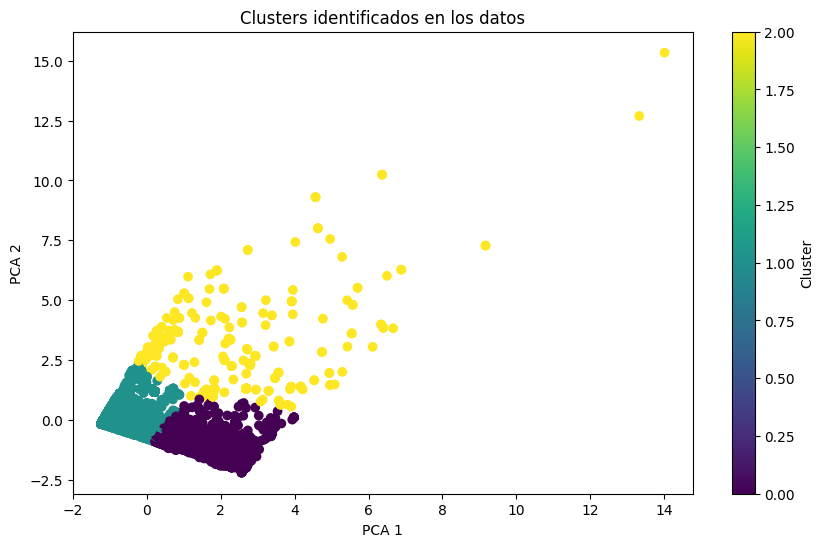

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar las características numéricas para el clustering
numeric_columns = ['montototal', 'avancefinanciero', 'avancefisico', 'duracionobrasdias']
data_for_clustering = gdf_combined[numeric_columns]

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Aplicar PCA para reducir la dimensionalidad y facilitar la visualización
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Aplicar K-means con un número predefinido de clusters, por ejemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Añadir los clusters al GeoDataFrame
gdf_combined['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters identificados en los datos')
plt.colorbar(label='Cluster')
plt.show()


### Representación versión 1 de Clusters en un Mapa

Finalmente, representamos los clusters en un mapa de Argentina utilizando folium y las geometrías extraídas de los GeoJSON.

In [61]:
import folium

# Crear un mapa centrado en Argentina (ajusta las coordenadas según sea necesario)
mapa = folium.Map(location=[-38.4161, -63.6167], zoom_start=5)

# Agregar los puntos del GeoDataFrame al mapa
for idx, row in gdf_combined.iterrows():
    # Suponiendo que las geometrías sean de tipo Point
    if row['geometry'].geom_type == 'Point':
        folium.CircleMarker(
            location=(row['geometry'].y, row['geometry'].x),
            radius=5,
            color=['red', 'green', 'blue'][row['Cluster']],
            fill=True,
            fill_opacity=0.6
        ).add_to(mapa)

# Mostrar el mapa
mapa


Guardamos en un HTML esta primera versión del mapa para compartirlo en gitgub y luego lo utilizaremos para la solución final que integra todos los componentes

In [64]:
# Guardar el mapa como un archivo HTML para cargar a Github
mapa.save('mapa_interactivo v.1.html')